In [159]:
%matplotlib inline
import math
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import csv
np.set_printoptions(precision=5)
plt.rcParams['font.size'] = 13
# 日本語対応
mpl.rcParams['font.family'] = 'Osaka'

In [160]:
data = pd.read_csv("Network1.csv")
data

,Participant.id_in_session,Participant.code,Participant.label,Participant._is_bot,Participant._index_in_pages,Participant._max_page_index,Participant._current_app_name,Participant._round_number,Participant._current_page_name,Participant.ip_address,...,Subsession.round_number,Session.code,Session.label,Session.experimenter_name,Session.time_scheduled,Session.time_started,Session.mturk_HITId,Session.mturk_HITGroupId,Session.comment,Session.is_demo
0,1,n6zj80ba,NaN,0,140,140,network1,20,ResultsSummary,10.71.223.81,...,1,wppnzrsj,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,2,47yu3fhs,NaN,0,140,140,network1,20,ResultsSummary,10.13.217.57,...,1,wppnzrsj,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,3,pvfol3ln,NaN,0,140,140,network1,20,ResultsSummary,10.111.206.121,...,1,wppnzrsj,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,4,5bu9f5ak,NaN,0,140,140,network1,20,ResultsSummary,10.170.178.66,...,1,wppnzrsj,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,5,lae8sez4,NaN,0,140,140,network1,20,ResultsSummary,10.170.178.66,...,1,wppnzrsj,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
5,6,zy7uujkq,NaN,0,140,140,network1,20,ResultsSummary,10.238.24.253,...,1,wppnzrsj,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
6,7,5msqrd8g,NaN,0,140,140,network1,20,ResultsSummary,10.178.230.6,...,1,wppnzrsj,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
7,8,s14c3qjo,NaN,0,140,140,network1,20,ResultsSummary,10.79.194.218,...,1,wppnzrsj,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
8,9,c4ej6485,NaN,0,140,140,network1,20,ResultsSummary,10.178.216.75,...,1,wppnzrsj,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
9,1,n6zj80ba,NaN,0,140,140,network1,20,ResultsSummary,10.71.223.81,...,2,wppnzrsj,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [161]:
data = pd.read_csv("Network1.csv")

df = data.loc[:, [
        "Participant.id_in_session", 
        "Player.id_in_group", 
        "Player.player_role", 
        "Player.action", 
        "Player.opponents", 
        "Player.op_actions", 
        "Subsession.round_number", ]
             ]

In [162]:
df

,Participant.id_in_session,Player.id_in_group,Player.player_role,Player.action,Player.opponents,Player.op_actions,Subsession.round_number
0,1,1,1,1,"[2, 9]","[1, 0]",1
1,2,2,0,1,"[3, 1]","[1, 1]",1
2,3,3,1,1,"[4, 2]","[0, 1]",1
3,4,4,1,1,"[5, 3]","[0, 1]",1
4,5,5,1,0,"[6, 4]","[0, 0]",1
5,6,6,1,0,"[7, 5]","[1, 0]",1
6,7,7,1,1,"[8, 6]","[1, 0]",1
7,8,8,0,1,"[9, 7]","[0, 1]",1
8,9,9,0,0,"[1, 8]","[1, 1]",1
9,1,1,1,0,"[2, 9]","[0, 0]",2


In [175]:
def plotStageAction(player_actions, player_roles, periods):
    fig, axes = plt.subplots(4, 5, figsize=(20, 16))
    fig.suptitle("Network1: red-active, blue-inactive", fontsize=24)
    for line_axes in axes:
        for ax in line_axes:
            for d in ["top", "bottom", "right", "left"]:
                ax.spines[d].set_visible(False)
                ax.tick_params(axis='x', which='both', bottom='off', top='off', labelbottom='off')
                ax.tick_params(axis='y', which='both', left='off', right='off', labelleft='off')
    
    x_list = [0, -0.64, -0.98, -0.87, -0.34, 0.34, 0.87, 0.98, 0.64, 0]#[0, 0.95, 0.59, -0.59, -0.95, 0]
    y_list = [1, 0.77, 0.18, -0.5, -0.94, -0.94, -0.5, 0.17, 0.77, 1]#[1, 0.31, -0.81, -0.81, 0.31, 1]
    
    for p in range(periods):
        ax_x = p//5
        ax_y = p%5
        axes[ax_x, ax_y].set_title("Period{}".format(p+1), fontsize=16)
        axes[ax_x, ax_y].plot(x_list, y_list, color='gray')
        for i in range(9):
            if player_roles[p][i] == 0:
                marker = "o"
            else:
                marker = "D"
                
            if player_actions[p][i] == 0:
                axes[ax_x, ax_y].plot(x_list[i], y_list[i], marker, color='red', markersize=12)
            elif player_actions[p][i] == 1:
                axes[ax_x, ax_y].plot(x_list[i], y_list[i], marker, color='blue', markersize=12)
            elif player_actions[p][i] == 2:
                axes[ax_x, ax_y].plot(x_list[i], y_list[i], marker, color='purple', markersize=12)
        axes[ax_x, ax_y].set_xlim(-1.1, 1.1)
        axes[ax_x, ax_y].set_ylim(-1.1, 1.1)
    plt.show()

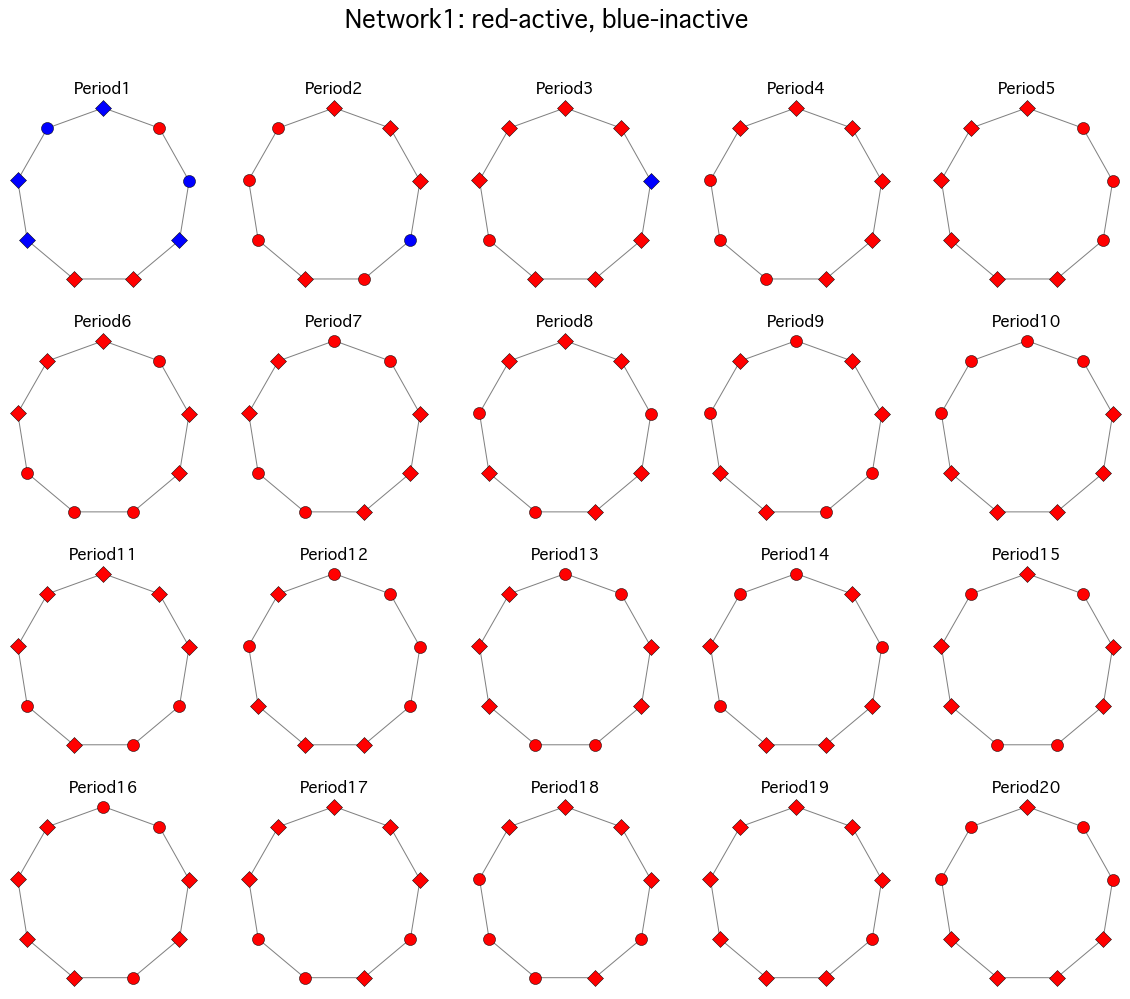

In [176]:
nodes = [1, 2, 3, 4, 5, 6, 7, 8, 9]
periods = 20
player_actions = [[] for p in range(periods)]
player_roles = [[] for p in range(periods)]

for p in range(periods):
    players = df.iloc[p*len(nodes):(p+1)*len(nodes), :]
    player_actions[p] = list(players["Player.action"])
    player_roles[p] = list(players["Player.player_role"])

plotStageAction(player_actions, player_roles, p+1)